***Incidence calculation***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Initialization of fixed parameters

#year = (2014,2015,2016,2017,2018,2019,2020,2021)
numbers = (47.26, 54.35, 59.23, 58.69, 51.37, 76, 34.408, 26,955)

a1 = (0.05, 0.023, 0.036, 0.037, 0.0359, 0.044, 0.046, 0.098)

a2 = (0.42, 0.88, 0.8, 0.81, 0.8064, 0.719, 0.51, 0.529)

#pop_changing = (174570,180889,187437,194222,201020,208277,215692,223241)

#population= 194222
n_iter = 100000

incidence = []
lower_ci = []
upper_ci = []


#Define alpha and beta values
def getAlphaBeta(mu, sigma):
    alpha=(((1-mu)/sigma**2)-(1/mu))*mu**2
    beta=((1/mu)-1)*alpha

    return alpha, beta



Calculating population

In [3]:
#before 2017
year= [2014,2015,2016,2017,2018,2019,2020,2021]
year1= year[0:3]
val_17 = 194222 # population in 2017
percentage=1.0362 # population growth rate for each year (2014-2016)
temp2 = val_17
pop_changing=[]

for i in year1:
  temp2 = temp2/percentage
  temp2 = math.ceil(temp2)
  pop_changing.append(temp2)
#pop_changing = pop_changing.reverse()

In [4]:
#reversing the population list
pop_changing
temp3 = pop_changing[0]
pop_changing[0] = pop_changing[2]
pop_changing[2] = temp3

In [5]:
#after 2017
year2=year[4:8]
per=(3.62, 3.61, 3.56, 3.50) # population growth rate for each year (2018-2021)
temp = val_17
for i in year2:
  temp = temp + (temp*per[i-2018]/100)
  temp = math.ceil(temp)
  pop_changing.append(temp)
pop_changing.insert(3, val_17) #inserting population for 2017
pop_changing

[174570, 180889, 187437, 194222, 201253, 208519, 215943, 223502]

In [6]:
#Calculate adjusted incidence for each year

for x in year:
  # Define the distribution of cases
  true_incidence = numbers[x-2014]/pop_changing[x-2014]
  cases_dist = np.random.binomial(n=pop_changing[x-2014], p=true_incidence, size=n_iter)

  # Define the distributions of the adjustment factors
  (alpha1,beta1) = getAlphaBeta(a1[x-2014],0.01)
  (alpha2,beta2) = getAlphaBeta(a2[x-2014],0.01)
  (alpha3,beta3) = getAlphaBeta(0.99,0.01)

  a1_dist = np.random.beta(alpha1, beta1, size=n_iter)
  a2_dist = np.random.beta(alpha2, beta2, size=n_iter)
  a3_dist = np.random.beta(alpha3, beta3, size=n_iter)

  # Calculate the crude incidence rate
  crude_rate_dist = cases_dist / pop_changing[x-2014]

  # Calculate the adjusted incidence rate
  adjusted_rate_dist = crude_rate_dist / (a1_dist * a2_dist * a3_dist)
  incidence.append(np.mean(adjusted_rate_dist*100000))

  # Calculate the uncertainty intervals (e.g. 95% confidence intervals) for the adjusted incidence rate
  lower_ci.append(np.percentile(adjusted_rate_dist*100000,2.5))
  upper_ci.append(np.percentile(adjusted_rate_dist*100000,97.5))


Text(0.5, 1.0, 'Clinical pneumonia incidence calculation')

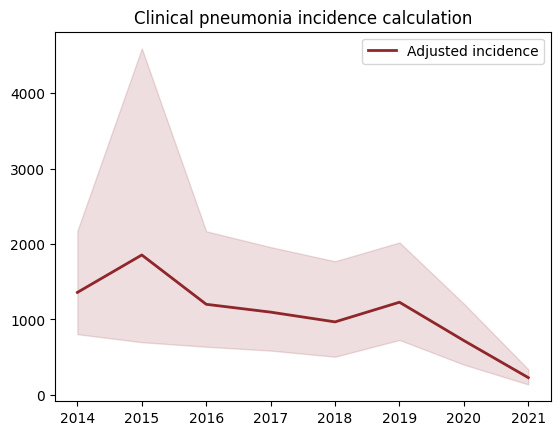

In [7]:
#Plotting the values

plt.plot(year, incidence, '#8F262A', linewidth=2, markersize=12)
#plt.plot(year, lower_ci,'#B298CB', linewidth=2, markersize=12)
#plt.plot(year, upper_ci,'#98CB98', linewidth=2, markersize=12)
plt.fill_between(year, lower_ci, upper_ci, color='#8F262A', alpha=.15)
plt.legend(['Adjusted incidence'])
plt.title("Clinical pneumonia incidence calculation")

In [8]:
df = pd.DataFrame(
    {'year': year,"incidence":incidence,
     'upper_ci': upper_ci,
     'lower_ci': lower_ci
    })

In [9]:
df

,year,incidence,upper_ci,lower_ci
0,2014,1358.917485,2175.181514,805.003240
1,2015,1855.271610,4593.119711,698.675568
2,2016,1201.418185,2169.491611,638.281791
3,2017,1097.365589,1959.675108,587.594133
4,2018,968.080231,1772.022728,506.014612
5,2019,1228.792783,2021.376539,728.202730
6,2020,720.199179,1209.340601,401.228697
7,2021,229.002392,339.112474,138.263416


Downloading the dataset

In [10]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
te=pd.DataFrame(df)
te.to_excel("Clinical pneumonia incidence calculation.xlsx")